<a href="https://colab.research.google.com/github/Shoutaa/Pengolahan-Citra-_UAS/blob/main/Canny%20Edge%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementasi Kode Jurnal: Modifikasi Gambar untuk Eksperimen**

# 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Tujuan: Menghubungkan Google Drive ke Google Colab agar data (gambar)
    yang tersimpan di Google Drive dapat diakses langsung dari Colab.
    
*   Lokasi Mount: Drive akan di-mount ke direktori /content/drive.



# 2. Import Library

In [ ]:
import cv2
import numpy as np
import os




* cv2: Digunakan untuk manipulasi gambar, seperti pembacaan, penulisan, dan transformasi.
* numpy (np): Digunakan untuk operasi matematis, seperti penambahan noise.
* os: Digunakan untuk pengelolaan file dan folder.



# 3. Fungsi Modifikasi Gambar
Berikut adalah fungsi-fungsi untuk melakukan berbagai modifikasi pada gambar:



1.   **Menambahkan Noise Gaussian**



In [ ]:
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.uint8)
    noisy_image = cv2.add(image, gauss)
    return noisy_image


* Penjelasan
 * Noise Gaussian dengan rata-rata (mean) 0 dan standar deviasi (sigma) 25 ditambahkan ke gambar.
 * Hasil noise dijumlahkan dengan gambar asli untuk menghasilkan gambar dengan noise.


2. **Memutar Gambar**


In [ ]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (w, h))
    return rotated_image


* Penjelasan
 * Gambar diputar sebesar angle derajat (dalam hal ini, 15°).
 * Fungsi cv2.getRotationMatrix2D digunakan untuk menghitung matriks transformasi rotasi.
 * cv2.warpAffine menerapkan transformasi rotasi ke gambar.

3. **Mengubah Pencahayaan**

In [ ]:
def change_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = cv2.add(hsv[:, :, 2], value)
    brightened_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return brightened_image


* Penjelasan
 * Gambar diubah ke ruang warna HSV menggunakan cv2.cvtColor.
 * Nilai kecerahan (V) di channel HSV ditambah dengan value (dalam hal ini, 50).
 * Gambar dikonversi kembali ke ruang warna BGR untuk disimpan.

4. **Mengubah Skala atau resolusi**

In [ ]:
def resize_image(image, scale):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    return resized_image


* Penjelasan
 * Gambar diubah ukurannya dengan skala tertentu (scale), dalam hal ini 0.8 (80% dari ukuran asli).
 * Fungsi cv2.resize digunakan untuk memperbesar atau memperkecil gambar.

# 4. Menentukan Path Folder

In [ ]:
reference_folder = "/content/drive/MyDrive/images/reference"
test_folder = "/content/drive/MyDrive/images/test"




*   reference_folder: Lokasi folder gambar referensi.
*   test_folder: Lokasi folder untuk menyimpan gambar hasil modifikasi (Set B).



# 5. Membuat Folder Uji

In [ ]:
os.makedirs(test_folder, exist_ok=True)


Membuat folder test_folder jika folder tersebut belum ada.

# 6.  Loop untuk Memodifikasi Gambar

In [ ]:
for file_name in os.listdir(reference_folder):
    if file_name.endswith('.jpg'):
        ref_path = os.path.join(reference_folder, file_name)
        test_path = os.path.join(test_folder, file_name)

        # Membaca gambar referensi
        image = cv2.imread(ref_path)

        # Modifikasi gambar
        noisy_image = add_noise(image)
        rotated_image = rotate_image(image, angle=15)
        brightened_image = change_brightness(image, value=50)
        resized_image = resize_image(image, scale=0.8)

        # Menggabungkan semua modifikasi ke dalam satu gambar
        combined_image = np.hstack((
            noisy_image,
            rotated_image,
            brightened_image,
            cv2.resize(resized_image, (image.shape[1], image.shape[0]))
        ))

        # Menyimpan gambar hasil modifikasi
        cv2.imwrite(test_path, combined_image)


* Proses:
  1. Iterasi melalui semua file gambar di folder referensi.
  2. Membaca gambar menggunakan cv2.imread.
  3. Menerapkan setiap modifikasi:
    * Noise
    * Rotasi
    * Perubahan pencahayaan
    * Perubahan skala
  4. Menggabungkan semua modifikasi ke dalam satu gambar menggunakan np.hstack untuk uji visual.
  5. Menyimpan hasil modifikasi di folder uji.

# 7. Pesan Sukses


In [ ]:
print("Set B (gambar uji) berhasil dibuat dengan modifikasi.")


Set B (gambar uji) berhasil dibuat dengan modifikasi.


# Dokumentasi Kode: Perbandingan Gambar dengan Canny Edge Detection dan SSIM

## Pendahuluan
Kode ini dirancang untuk membandingkan gambar dari dua folder berbeda. Gambar akan melalui proses pra-pemrosesan, deteksi tepi menggunakan algoritma Canny, dan perhitungan kesamaan menggunakan Structural Similarity Index (SSIM). Hasil analisis mencakup nilai akurasi piksel dan skor SSIM.

---

## Fungsi-Fungsi

### 1. **`preprocess_image(image_path, target_size=(256, 256))`**

#### Deskripsi
Fungsi ini membaca gambar, mengonversinya ke grayscale, mengubah ukurannya sesuai dimensi target, dan melakukan binarisasi.

#### Parameter
- **`image_path`**: Path dari gambar yang akan diproses.
- **`target_size`**: Tuple yang menentukan dimensi gambar target (default: `(256, 256)`).

#### Return
- **`resized_image`**: Gambar grayscale yang telah diubah ukurannya.
- **`binary_image`**: Gambar binarisasi (hitam putih).

---

### 2. **`canny_edge_detection(binary_image)`**

#### Deskripsi
Fungsi ini menggunakan algoritma Canny untuk mendeteksi tepi pada gambar binarisasi. Parameter bawah dan atas dihitung secara otomatis berdasarkan nilai median piksel.

#### Parameter
- **`binary_image`**: Gambar binarisasi untuk deteksi tepi.

#### Return
- **`edges`**: Gambar hasil deteksi tepi.

---

### 3. **`calculate_accuracy(ref_image, test_image)`**

#### Deskripsi
Fungsi ini membandingkan dua gambar piksel-per-piksel untuk menghitung akurasi.

#### Parameter
- **`ref_image`**: Gambar referensi.
- **`test_image`**: Gambar uji.

#### Return
- **`accuracy`**: Persentase akurasi piksel antara dua gambar.

---

### 4. **`compare_images(reference_folder, test_folder)`**

#### Deskripsi
Fungsi utama untuk membandingkan semua gambar di folder referensi dengan gambar di folder uji. Fungsi ini:
1. Membaca semua gambar dari kedua folder.
2. Melakukan pra-pemrosesan, deteksi tepi, dan perhitungan SSIM.
3. Menampilkan hasil perbandingan melalui plot dan mencetak nilai akurasi dan SSIM.

#### Parameter
- **`reference_folder`**: Path folder yang berisi gambar referensi.
- **`test_folder`**: Path folder yang berisi gambar uji.

#### Proses
1. Membaca semua file `.jpg` dari kedua folder.
2. Untuk setiap pasangan gambar referensi dan gambar uji:
   - Pra-pemrosesan (grayscale, resize, binarisasi).
   - Deteksi tepi menggunakan Canny.
   - Perhitungan akurasi piksel.
   - Perhitungan SSIM antara gambar referensi dan uji.
3. Menampilkan hasil perbandingan dengan grafik menggunakan Matplotlib.
4. Menghitung rata-rata akurasi dan SSIM untuk seluruh pasangan gambar.

#### Return
- Tidak ada, tetapi mencetak hasil analisis dan menampilkan grafik.

#### Output
- **Akurasi**: Persentase kesamaan piksel antara gambar referensi dan gambar uji.
- **SSIM**: Skor kesamaan struktural antara gambar referensi dan gambar uji.
- **Visualisasi**: Grafik perbandingan grayscale dan hasil deteksi tepi.

---

## Contoh Eksekusi
### Path Folder
```python
reference_folder = "/content/drive/MyDrive/images/reference"
test_folder = "/content/drive/MyDrive/images/test"


Menampilkan pesan bahwa proses selesai dan gambar uji berhasil dibuat.

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah1.jpg dan /content/drive/MyDrive/images/test/wajah1.jpg
Akurasi antara wajah1.jpg dan wajah1.jpg: 96.15%
SSIM antara wajah1.jpg dan wajah1.jpg: 0.5210


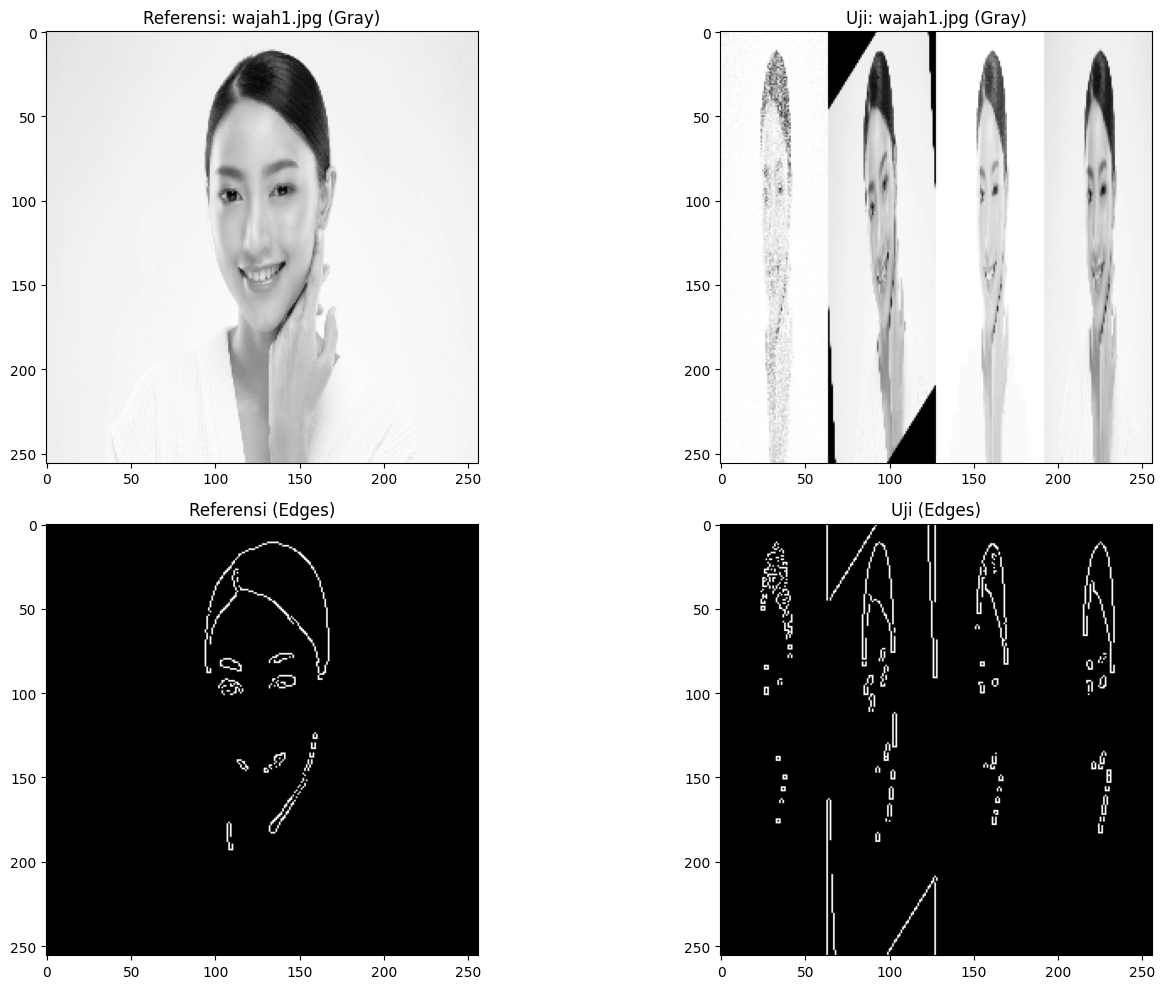

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah10.jpg dan /content/drive/MyDrive/images/test/wajah10.jpg
Akurasi antara wajah10.jpg dan wajah10.jpg: 93.07%
SSIM antara wajah10.jpg dan wajah10.jpg: 0.3417


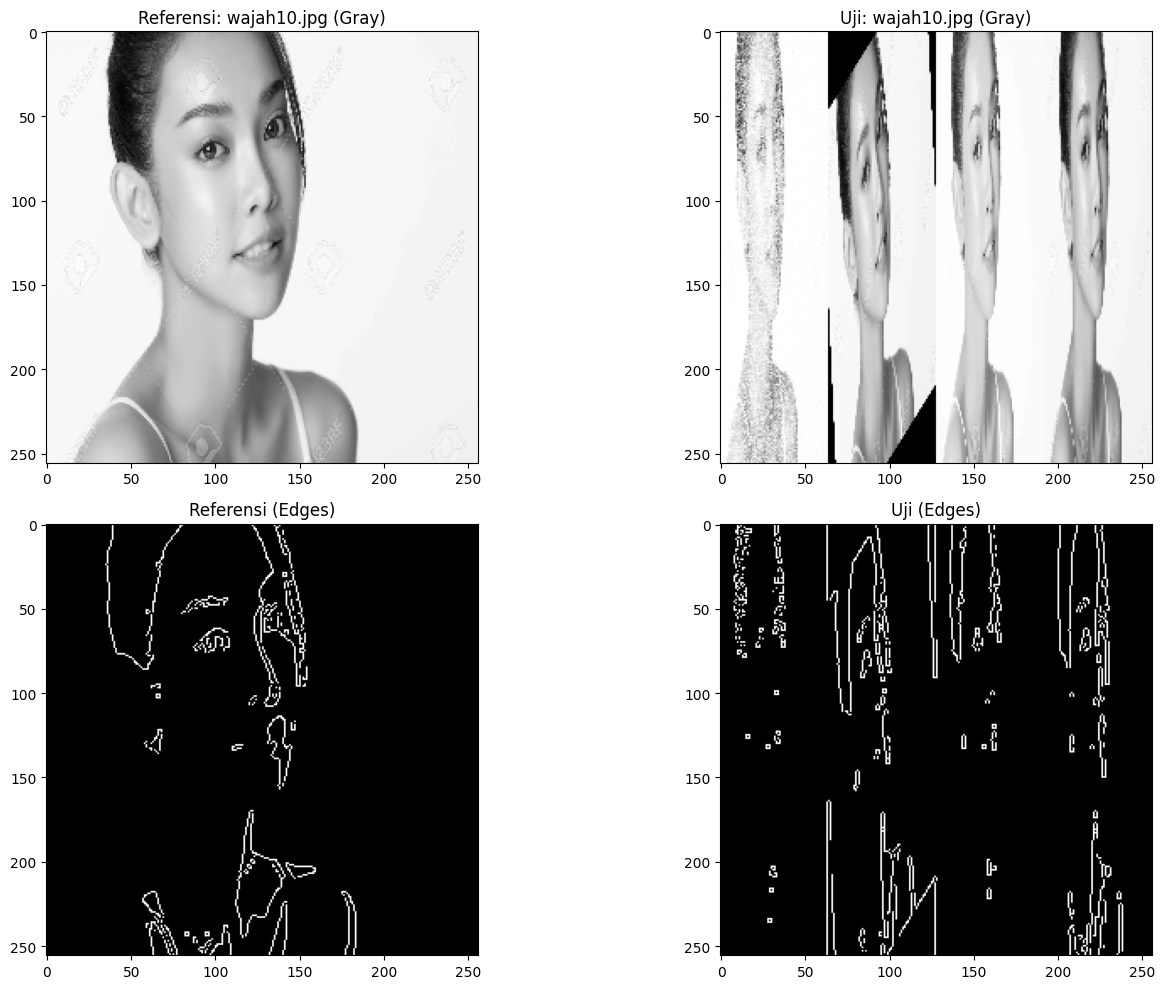

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah2.jpg dan /content/drive/MyDrive/images/test/wajah2.jpg
Akurasi antara wajah2.jpg dan wajah2.jpg: 90.61%
SSIM antara wajah2.jpg dan wajah2.jpg: 0.2564


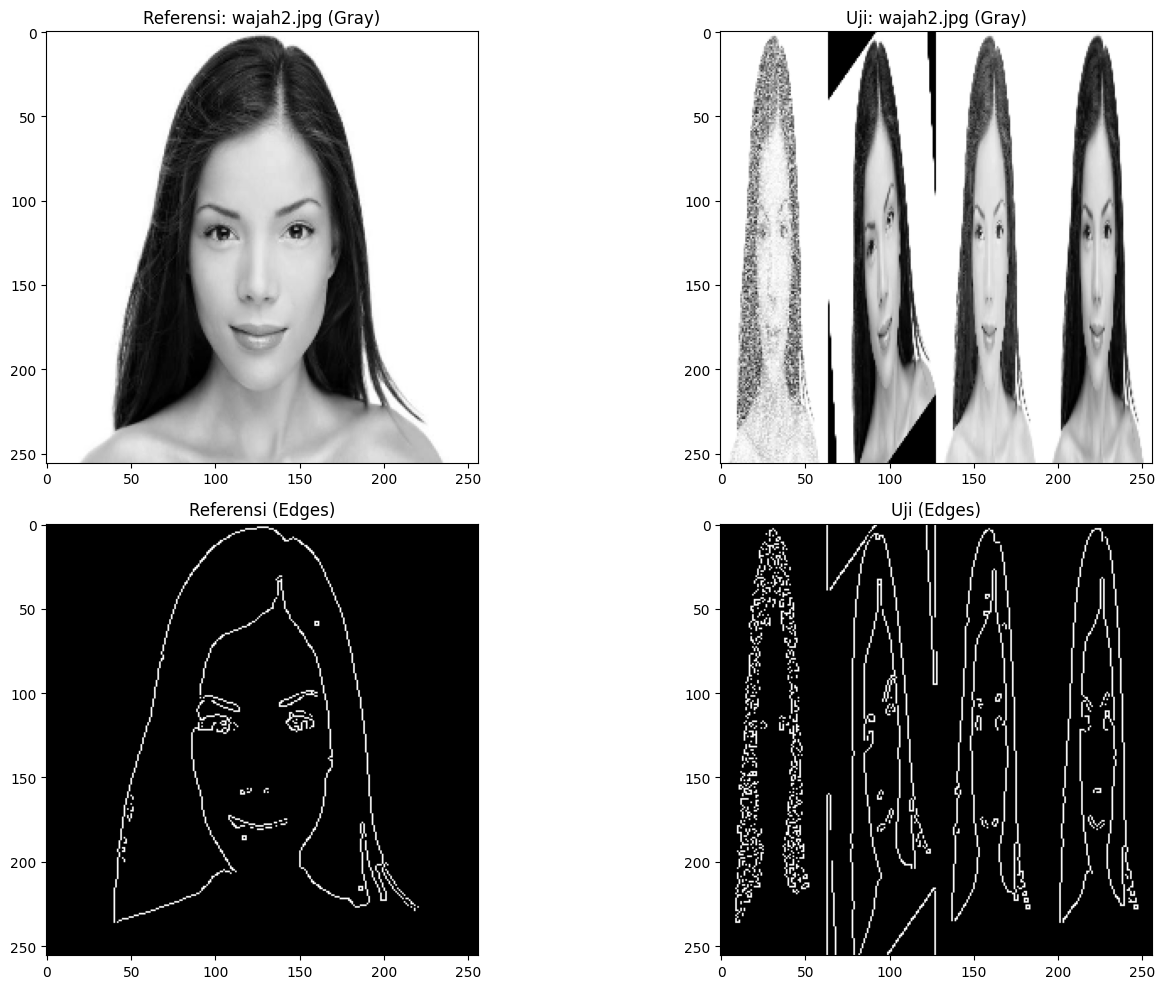

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah6.jpg dan /content/drive/MyDrive/images/test/wajah6.jpg
Akurasi antara wajah6.jpg dan wajah6.jpg: 95.06%
SSIM antara wajah6.jpg dan wajah6.jpg: 0.4166


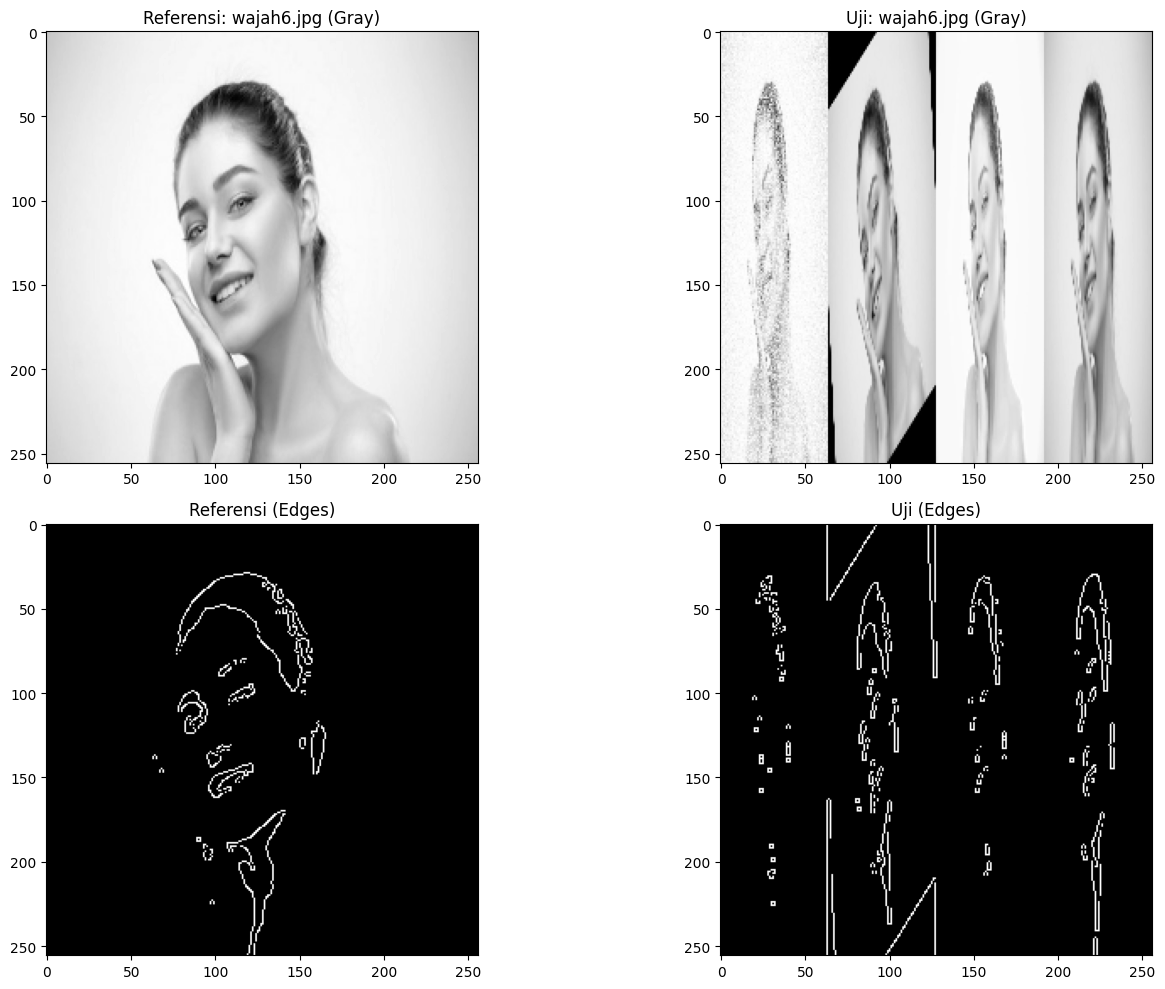

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah7.jpg dan /content/drive/MyDrive/images/test/wajah7.jpg
Akurasi antara wajah7.jpg dan wajah7.jpg: 95.47%
SSIM antara wajah7.jpg dan wajah7.jpg: 0.4469


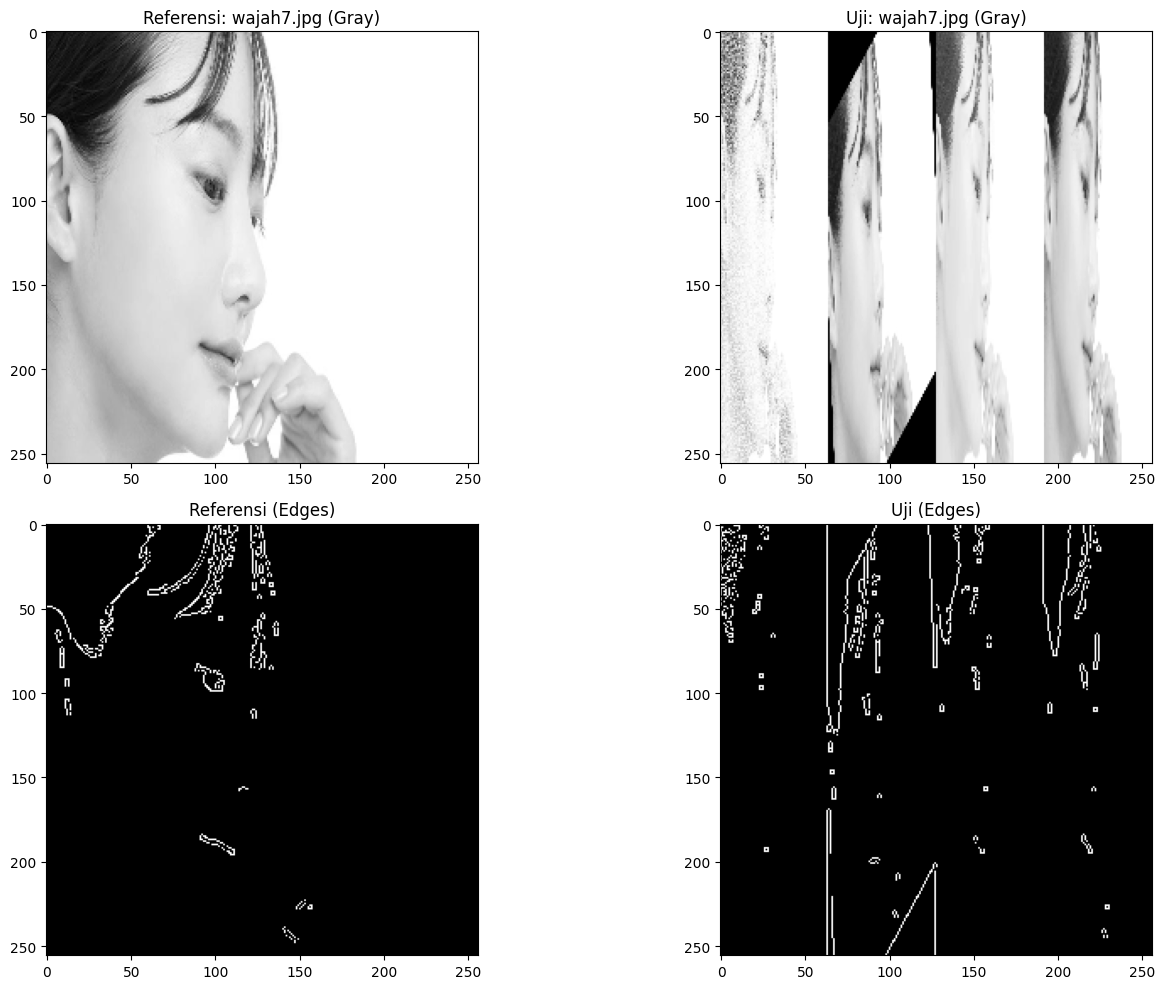

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah8.jpg dan /content/drive/MyDrive/images/test/wajah8.jpg
Akurasi antara wajah8.jpg dan wajah8.jpg: 94.24%
SSIM antara wajah8.jpg dan wajah8.jpg: 0.3953


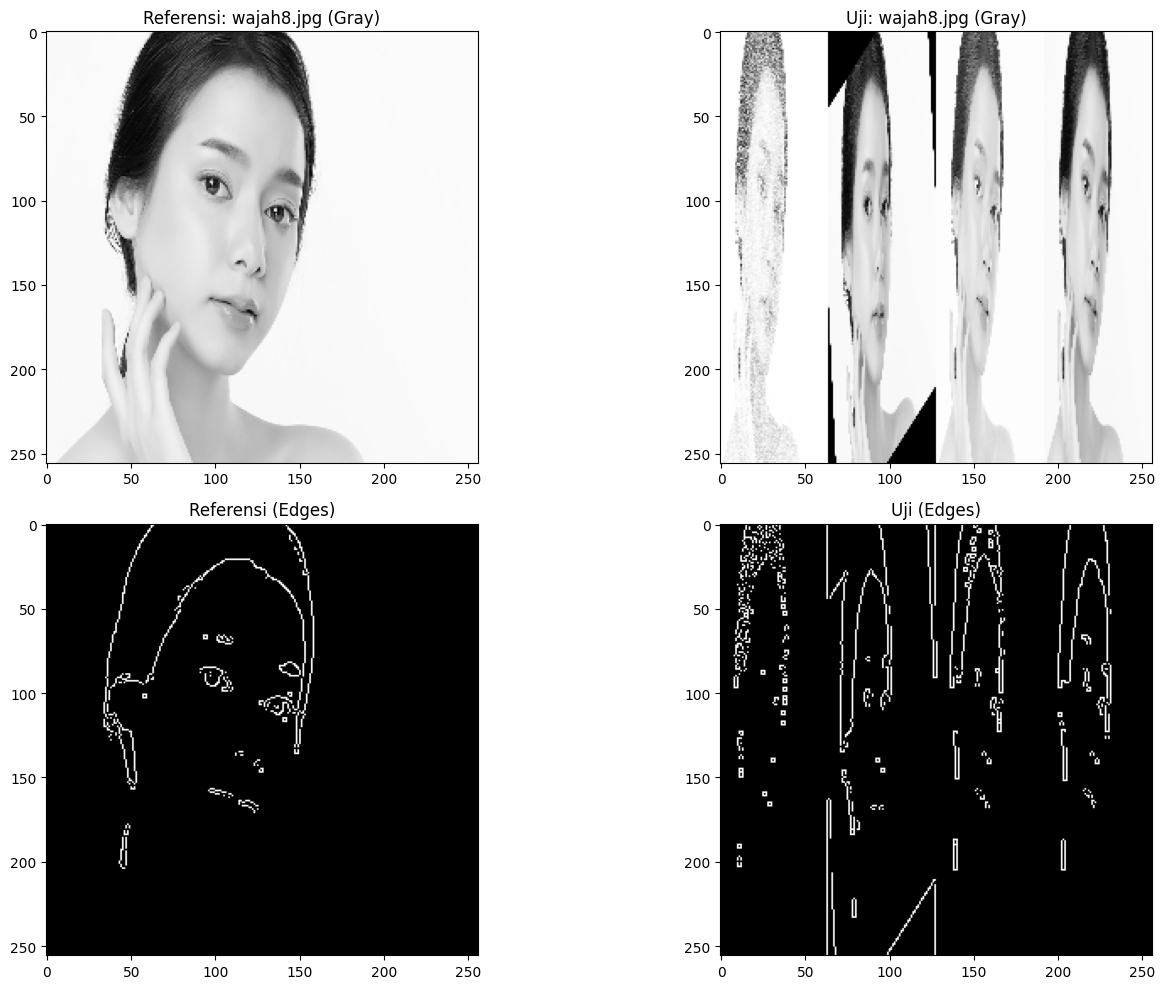

Menyiapkan gambar: /content/drive/MyDrive/images/reference/wajah9.jpg dan /content/drive/MyDrive/images/test/wajah9.jpg
Akurasi antara wajah9.jpg dan wajah9.jpg: 91.68%
SSIM antara wajah9.jpg dan wajah9.jpg: 0.2829


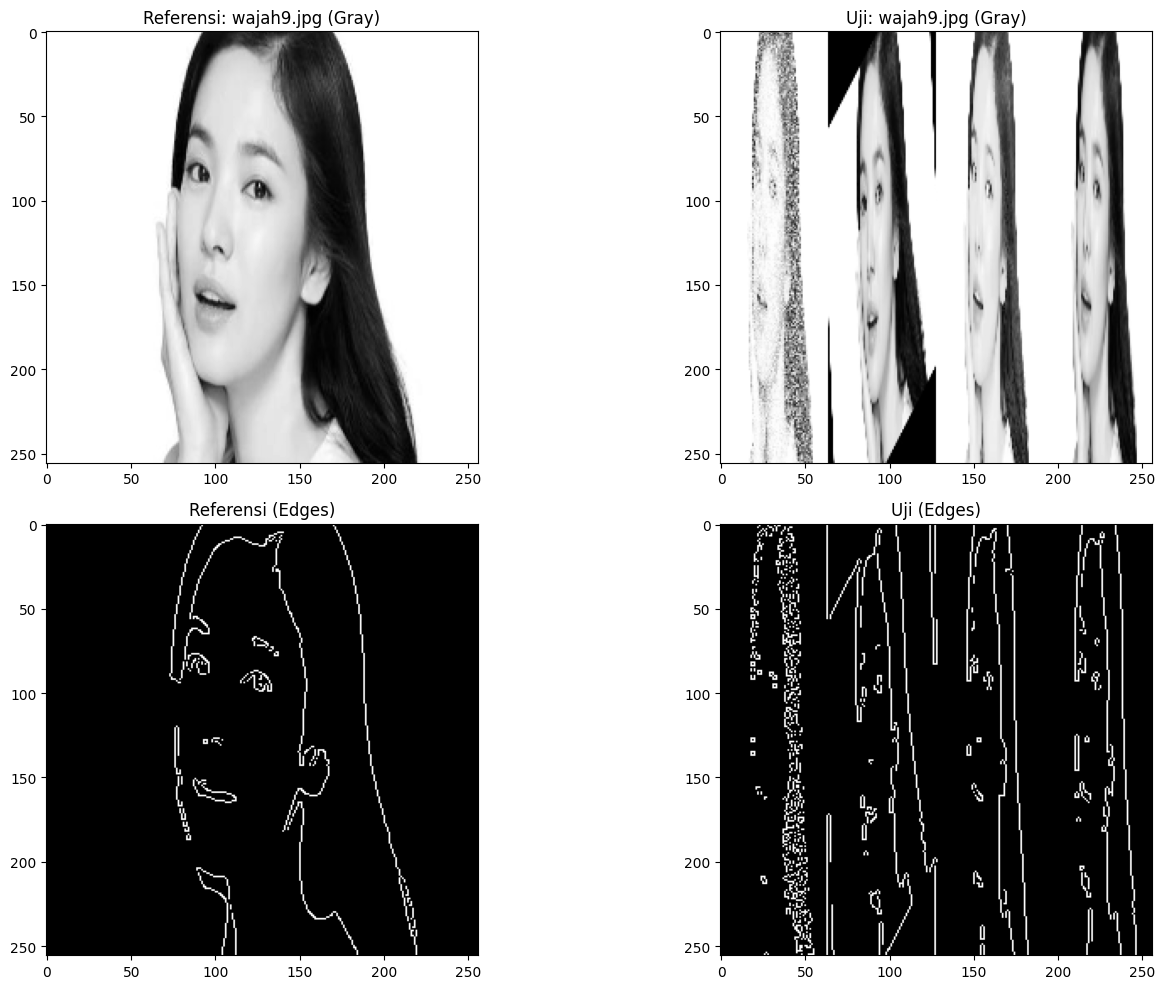

Rata-rata Akurasi: 93.75%
Rata-rata SSIM: 0.3801


In [ ]:
import cv2
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Fungsi untuk membaca gambar, melakukan pra-pemrosesan, dan normalisasi ukuran
def preprocess_image(image_path, target_size=(256, 256)):
    # Membaca gambar
    image = cv2.imread(image_path)
    # Mengkonversi gambar ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mengubah ukuran gambar ke target size
    resized_image = cv2.resize(gray_image, target_size)
    # Melakukan binarisasi
    _, binary_image = cv2.threshold(resized_image, 127, 255, cv2.THRESH_BINARY)
    return resized_image, binary_image

# Fungsi untuk melakukan deteksi tepi menggunakan Canny dengan parameter otomatis
def canny_edge_detection(binary_image):
    # Menghitung median piksel untuk menentukan parameter
    median_pixel = np.median(binary_image)
    lower_threshold = int(max(0, 0.66 * median_pixel))
    upper_threshold = int(min(255, 1.33 * median_pixel))
    edges = cv2.Canny(binary_image, lower_threshold, upper_threshold)
    return edges

# Fungsi untuk menghitung akurasi berdasarkan perbandingan piksel
def calculate_accuracy(ref_image, test_image):
    matching_pixels = np.sum(ref_image == test_image)
    total_pixels = ref_image.size
    accuracy = (matching_pixels / total_pixels) * 100
    return accuracy

# Menyusun gambar dari folder yang diberikan
def compare_images(reference_folder, test_folder):
    reference_images = sorted([os.path.join(reference_folder, f) for f in os.listdir(reference_folder) if f.endswith('.jpg')])
    test_images = sorted([os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith('.jpg')])

    # Looping untuk membandingkan gambar
    accuracies = []
    ssim_scores = []
    for ref_img, test_img in zip(reference_images, test_images):
        print(f'Menyiapkan gambar: {ref_img} dan {test_img}')

        # Pra-pemrosesan gambar
        ref_gray, ref_binary = preprocess_image(ref_img)
        test_gray, test_binary = preprocess_image(test_img)

        # Deteksi tepi menggunakan Canny
        ref_edges = canny_edge_detection(ref_binary)
        test_edges = canny_edge_detection(test_binary)

        # Menghitung akurasi berdasarkan piksel
        accuracy = calculate_accuracy(ref_edges, test_edges)
        accuracies.append(accuracy)

        # Menghitung SSIM
        similarity_index, _ = ssim(ref_gray, test_gray, full=True)
        ssim_scores.append(similarity_index)

        print(f'Akurasi antara {os.path.basename(ref_img)} dan {os.path.basename(test_img)}: {accuracy:.2f}%')
        print(f'SSIM antara {os.path.basename(ref_img)} dan {os.path.basename(test_img)}: {similarity_index:.4f}')

        # Menampilkan gambar untuk analisis
        plt.figure(figsize=(15, 10))
        plt.subplot(2, 2, 1)
        plt.title(f'Referensi: {os.path.basename(ref_img)} (Gray)')
        plt.imshow(ref_gray, cmap='gray')
        plt.subplot(2, 2, 2)
        plt.title(f'Uji: {os.path.basename(test_img)} (Gray)')
        plt.imshow(test_gray, cmap='gray')
        plt.subplot(2, 2, 3)
        plt.title(f'Referensi (Edges)')
        plt.imshow(ref_edges, cmap='gray')
        plt.subplot(2, 2, 4)
        plt.title(f'Uji (Edges)')
        plt.imshow(test_edges, cmap='gray')
        plt.tight_layout()
        plt.show()

    # Menghitung rata-rata akurasi dan SSIM
    average_accuracy = np.mean(accuracies)
    average_ssim = np.mean(ssim_scores)
    print(f'Rata-rata Akurasi: {average_accuracy:.2f}%')
    print(f'Rata-rata SSIM: {average_ssim:.4f}')

# Path folder referensi dan gambar uji
reference_folder = "/content/drive/MyDrive/images/reference"
test_folder = "/content/drive/MyDrive/images/test"

# Menjalankan fungsi perbandingan
compare_images(reference_folder, test_folder)